## Visualizing the embeddings in 2D

We will use t-SNE to reduce the dimensionality of the embeddings from 1536 to 2. Once the embeddings are reduced to two dimensions, we can plot them in a 2D scatter plot. The dataset is created in the [Obtain_dataset Notebook](Obtain_dataset.ipynb).

### 1. Reduce dimensionality

We reduce the dimensionality to 2 dimensions using t-SNE decomposition.

In [1]:
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from ast import literal_eval
import matplotlib


# Load the embeddings
datafile_path = "google_docs.csv"
df = pd.read_csv(datafile_path)
# Templates For Projects/ChatGPT Embeddings Demo/fine_food_reviews_with_embeddings_1k.csv


### 2. Plotting the embeddings

We colour each review by its star rating, ranging from red to green.
We can observe a decent data separation even in the reduced 2 dimensions.





/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


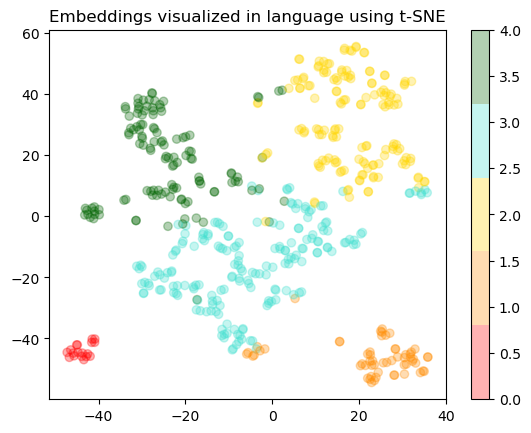

In [7]:


# Convert to a list of lists of floats
matrix = np.array(df.embedding.apply(literal_eval).to_list())

# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix)

# Extract x and y coordinates
x, y = vis_dims[:, 0], vis_dims[:, 1]

# Use KMeans clustering to identify clusters. Here I'm assuming 5 clusters but you can change the number.
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(matrix)
cluster_labels = kmeans.labels_

# Define a list of colors for the clusters. Extend or reduce this list depending on the number of clusters.
colors = ["red", "darkorange", "gold", "turquoise", "darkgreen"]

colormap = matplotlib.colors.ListedColormap(colors)
plt.scatter(x, y, c=cluster_labels, cmap=colormap, alpha=0.3)

plt.title("Embeddings visualized in language using t-SNE")
plt.colorbar()
plt.show()
